# __Para tener en cuenta:__

* Se debe entregar un único notebook con la solución.
* Se seleccionará a un integrante del grupo para realizar la sustentación.
* Se asignará un valor de 50% a la calidad de los resultados obtenidos y 50% a la calidad de la sustentación.



# **3. Segmentación de Mercado (Agrupamiento)**

El objetivo de este punto es aplicar algoritmos de aprendizaje no supervisado sobre los datos disponibles en: [Online Shoppers Purchasing Intention Dataset](https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset). Su propósito es identificar *grupos* de clientes que presenten patrones de comportamiento similares, lo que permitirá al área de mercadeo tomar decisiones adaptadas a cada segmento.

## **Tenga en cuenta:**

- Consulte en qué consiste la idea detrás del proceso de **segmentación de mercado** y su importancia en estrategias comerciales.
- Realice un análisis descriptivo de los datos disponibles.
- Consulte en qué consiste el algoritmo de aprendizaje no supervisado **DBSCAN**. Mencione sus ventajas y desventajas en comparación con **k-means**.
- Aplique ambos algoritmos a los datos disponibles. Presente los resultados obtenidos y determine la mejor agrupación según las métricas de evaluación.
- Consulte en qué consiste la reducción de dimensionalidad mediante el algoritmo **PCA**.
- Aplique nuevamente ambos algoritmos de agrupamiento posterior a la aplicación de **PCA**. Compare los resultados obtenidos sin la aplicación de PCA.
- A partir de los resultados obtenidos, elabore recomendaciones dirigidas al área de mercadeo relacionadas con la segmentación de mercado.

# Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

## Consulte en qué consiste la idea detrás del proceso de segmentación de mercado y su importancia en estrategias comerciales.

### **Segmentación de Mercado: Idea e Importancia en las Estrategias Comerciales**

La segmentación de mercado es el proceso de dividir un mercado amplio en grupos más pequeños y manejables de consumidores que comparten características, comportamientos o necesidades similares. El propósito es identificar segmentos de clientes distintos para dirigirse a ellos de manera más efectiva con productos, servicios y estrategias de marketing personalizadas. Este proceso permite a las empresas comprender mejor a su audiencia y satisfacer sus demandas específicas, lo que mejora la satisfacción del cliente y los resultados comerciales.

## **Pasos Clave en la Segmentación de Mercado**
1. **Identificación de Criterios de Segmentación**: Los criterios comunes incluyen:
   - **Demográficos**: Edad, género, ingresos, etc.
   - **Psicográficos**: Estilo de vida, valores, personalidad.
   - **Geográficos**: Ubicación, clima.
   - **Comportamentales**: Comportamiento de compra, lealtad a la marca.

2. **Análisis de Datos de Mercado**: Utilizando encuestas, datos de ventas y retroalimentación del consumidor para identificar patrones y agrupaciones.

3. **Evaluación de Segmentos**: Analizar el tamaño, accesibilidad y rentabilidad de cada segmento.

4. **Selección de Segmentos Objetivo**: Elegir los segmentos más prometedores para enfocar los esfuerzos de marketing.

5. **Posicionamiento**: Diseñar productos y mensajes de marketing que atraigan específicamente a los segmentos seleccionados.

## **Importancia en las Estrategias Comerciales**
1. **Mejor Comprensión del Cliente**: Permite a las empresas conocer las necesidades y preferencias de los consumidores, lo que facilita ofertas personalizadas.

2. **Asignación Eficiente de Recursos**: Al centrarse en grupos específicos, las empresas pueden utilizar sus recursos de manera más efectiva y evitar esfuerzos innecesarios.

3. **Desarrollo de Productos Mejorado**: Los insights obtenidos de la segmentación pueden guiar la creación de productos y servicios que cumplan con las necesidades precisas de un segmento.

4. **Ventaja Competitiva**: Al satisfacer mejor las necesidades de un segmento en comparación con los competidores, las empresas pueden diferenciarse en el mercado.

5. **Campañas de Marketing Optimizadas**: Las campañas personalizadas resuenan con más fuerza entre la audiencia objetivo, lo que genera mayores tasas de conversión y fidelidad.

6. **Maximización de Ganancias**: Al enfocarse en segmentos de alto valor o potencial, las empresas pueden aumentar la rentabilidad y el crecimiento.

En resumen, la segmentación de mercado es un pilar fundamental de las estrategias comerciales efectivas. Ayuda a las empresas a conectar con sus clientes de manera significativa, lo que impulsa el éxito en mercados competitivos.

---

### **Referencias**
- Kotler, P., & Keller, K. L. (2016). *Marketing Management* (15th ed.). Pearson Education.
- Armstrong, G., Kotler, P., Harker, M., & Brennan, R. (2018). *Principles of Marketing* (7th European ed.). Pearson Education.
- Solomon, M. R. (2020). *Consumer Behavior: Buying, Having, and Being* (13th ed.). Pearson Education.


## Realice un análisis descriptivo de los datos disponibles.

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468)

# data (as pandas dataframes)
X = online_shoppers_purchasing_intention_dataset.data.features
y = online_shoppers_purchasing_intention_dataset.data.targets

# Combine features and target for a complete view
data = pd.concat([X, y], axis=1)

In [4]:
# Basic information about the dataset
print("Información del dataset:")
data.info()

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 1

El atributo 'Revenue' se puede utilizar como etiqueta de clase.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" representan el número de diferentes tipos de páginas visitadas por el visitante en esa sesión y el tiempo total pasado en cada una de estas categorías de páginas. Los valores de estas características se derivan de la información de las URL de las páginas visitadas por el usuario y se actualizan en tiempo real cuando un usuario realiza una acción, por ejemplo, al pasar de una página a otra. Las características "Bounce Rate", "Exit Rate" y "Page Value" representan las métricas medidas por "Google Analytics" para cada página en el sitio de comercio electrónico. El valor de la característica "Bounce Rate" para una página web se refiere al porcentaje de visitantes que entran al sitio desde esa página y luego se van ("rebote") sin realizar ninguna otra solicitud al servidor de análisis durante esa sesión. El valor de la característica "Exit Rate" para una página web específica se calcula como, de todas las visualizaciones de la página, el porcentaje que fue la última en la sesión. La característica "Page Value" representa el valor promedio de una página web que un usuario visitó antes de completar una transacción en el comercio electrónico. La característica "Special Day" indica la cercanía del tiempo de visita al sitio con un día especial específico (por ejemplo, Día de la Madre, Día de San Valentín) en el cual es más probable que las sesiones se finalicen con una transacción. El valor de este atributo se determina considerando la dinámica del comercio electrónico, como la duración entre la fecha del pedido y la fecha de entrega. Por ejemplo, para el Día de San Valentín, este valor toma un valor distinto de cero entre el 2 de febrero y el 12 de febrero, siendo cero antes y después de esa fecha, a menos que esté cerca de otro día especial, y su valor máximo de 1 el 8 de febrero. El conjunto de datos también incluye el sistema operativo, el navegador, la región, el tipo de tráfico, el tipo de visitante (si es recurrente o nuevo), un valor booleano que indica si la fecha de la visita es fin de semana, y el mes del año.

In [5]:
data['Revenue'] = data['Revenue'].astype(int)
data['Weekend'] = data['Weekend'].astype(int)

In [6]:
# Descriptive statistics for numerical features
print("\nEstadísticas descriptivas para características numéricas:")
data.describe()


Estadísticas descriptivas para características numéricas:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000


In [7]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

In [8]:
def plot_numerical_distribution(data, numerical_columns):
    # Set a modern style for seaborn
    sns.set_theme(style="whitegrid")

    n_cols = 3  # Number of columns in the grid
    n_rows = int(np.ceil(len(numerical_columns) / n_cols))  # Calculate number of rows
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()  # Flatten for easy indexing

    # Plot distributions for each numerical column
    for i, col in enumerate(numerical_columns):
        ax = axes[i]
        sns.histplot(data[col], kde=True, bins=30, ax=ax, color="skyblue", edgecolor="black")
        ax.axvline(data[col].mean(), color='red', linestyle='--', label='Mean')
        ax.axvline(data[col].median(), color='green', linestyle='-', label='Median')
        ax.set_title(f'Distribution of {col}', fontsize=12)
        ax.set_xlabel(col, fontsize=10)
        ax.set_ylabel('Frequency', fontsize=10)
        ax.legend()

    # Remove empty subplots if there are fewer columns than plots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

def plot_categorical_distribution(data, categorical_columns):
    # Set a modern style for seaborn
    sns.set_theme(style="whitegrid")

    n_cols = 3  # Number of columns in the grid
    n_rows = int(np.ceil(len(categorical_columns) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()

    # Plot bar charts for each categorical column
    for i, col in enumerate(categorical_columns):
        ax = axes[i]
        sns.countplot(x=data[col], order=data[col].value_counts().index, ax=ax)

        # Add annotations (percentages)
        total = len(data[col])
        for p in ax.patches:
            percentage = f'{100 * p.get_height() / total:.1f}%'
            ax.text(
                p.get_x() + p.get_width() / 2,
                p.get_height() + 1,
                percentage,
                ha='center', fontsize=10
            )

        ax.set_title(f'Bar Plot of {col}', fontsize=12)
        ax.set_xlabel(col, fontsize=10)
        ax.set_ylabel('Count', fontsize=10)
        ax.tick_params(axis='x', rotation=45)

    # Remove empty subplots if there are fewer columns than plots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

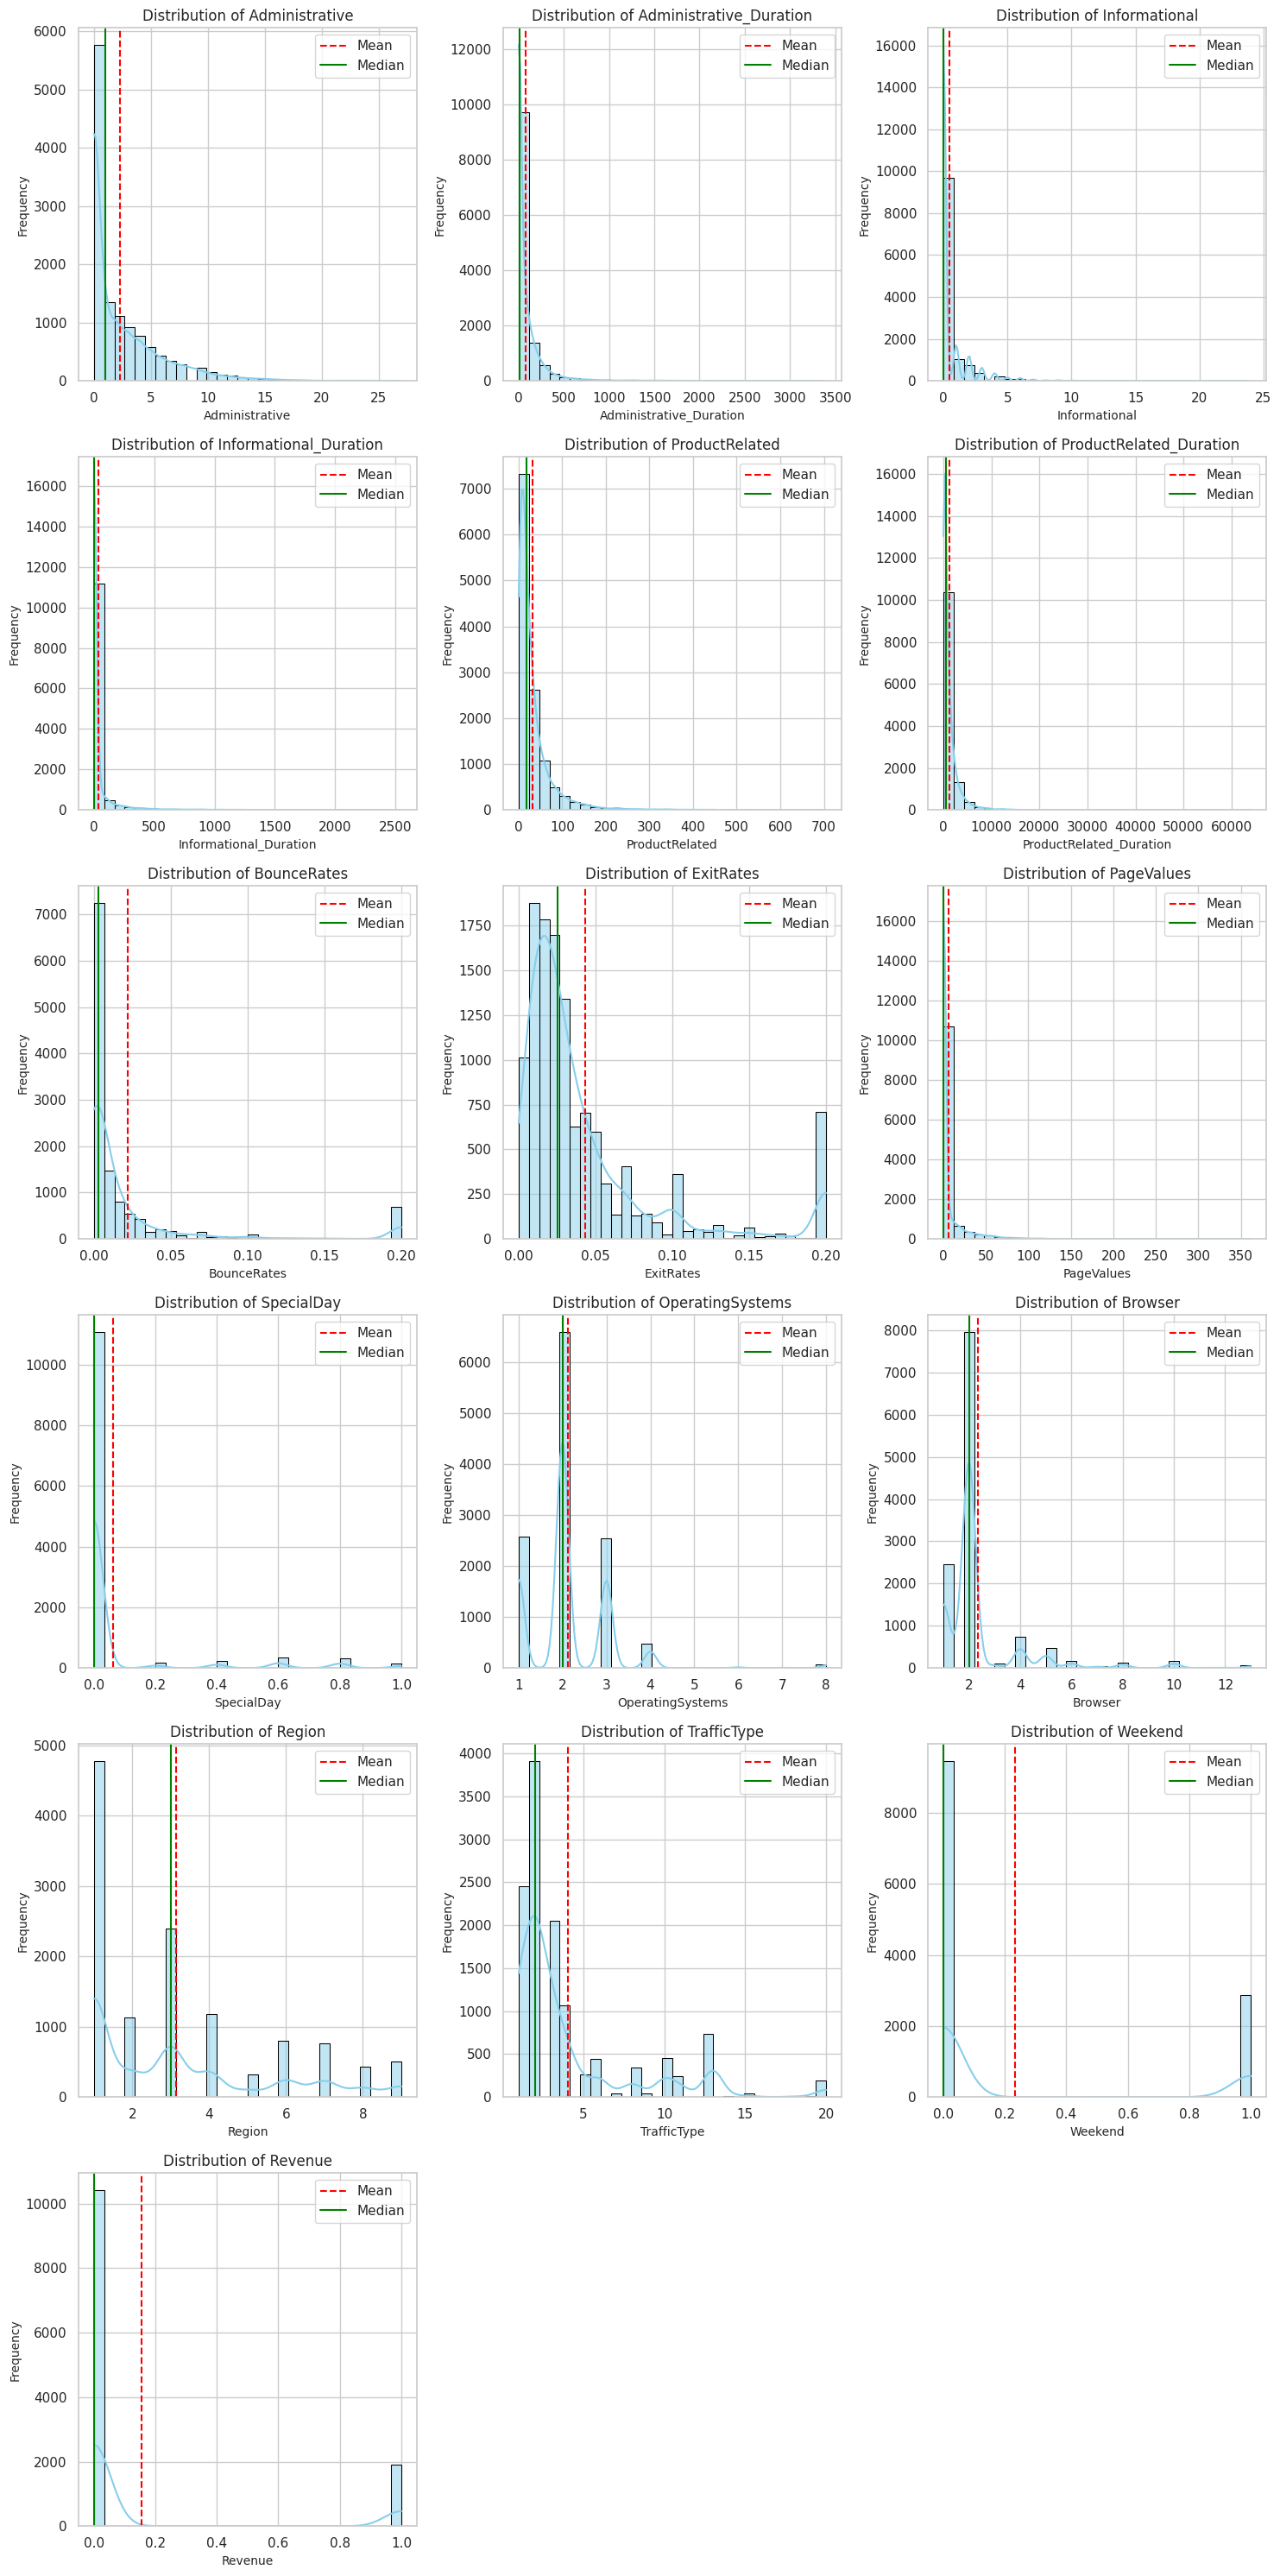

In [9]:
plot_numerical_distribution(data, numerical_columns)

Los resultados de las estadísticas descriptivas muestran una alta variabilidad en el comportamiento de los usuarios en un sitio de comercio electrónico. Las variables relacionadas con páginas administrativas, informativas y de productos reflejan que, en promedio, los usuarios visitan pocas páginas de tipo administrativo (2.32) y dedican un tiempo relativamente breve a estas secciones (81 segundos). Sin embargo, algunas sesiones registran interacciones significativamente más altas, con valores máximos de hasta 27 visitas y duraciones que superan los 3000 segundos. En contraste, las páginas relacionadas con productos tienen un promedio de 31 visitas por sesión y una duración media de 20 minutos, lo que destaca el interés generalizado por explorar productos. Este comportamiento puede variar desde usuarios que interactúan de forma mínima hasta aquellos que exploran extensivamente, con un máximo de 705 páginas vistas en una sesión.

Las métricas relacionadas con el valor de las páginas y las tasas de abandono reflejan un sitio que retiene bien a los usuarios. Las bajas tasas promedio de rebote (0.02) y salida (0.04) sugieren que la mayoría de los visitantes navegan más allá de una sola página antes de abandonar el sitio. Sin embargo, "Page Value", con una media de 5.89 y valores máximos de más de 360, indica que algunas páginas desempeñan un papel crucial en las transacciones. Por otro lado, las visitas cercanas a días especiales representan una minoría (6%), pero estas fechas pueden tener un impacto estratégico en las ventas, reflejado en las transacciones completadas durante estas fechas clave. Finalmente, el porcentaje bajo de sesiones que generan ingresos (15%) resalta la importancia de optimizar las experiencias de usuario para aumentar las conversiones en el comercio electrónico.








In [10]:
print("\nEstadísticas descriptivas para características categóricas:")
print(data[categorical_columns].describe())


Estadísticas descriptivas para características categóricas:
        Month        VisitorType
count   12330              12330
unique     10                  3
top       May  Returning_Visitor
freq     3364              10551


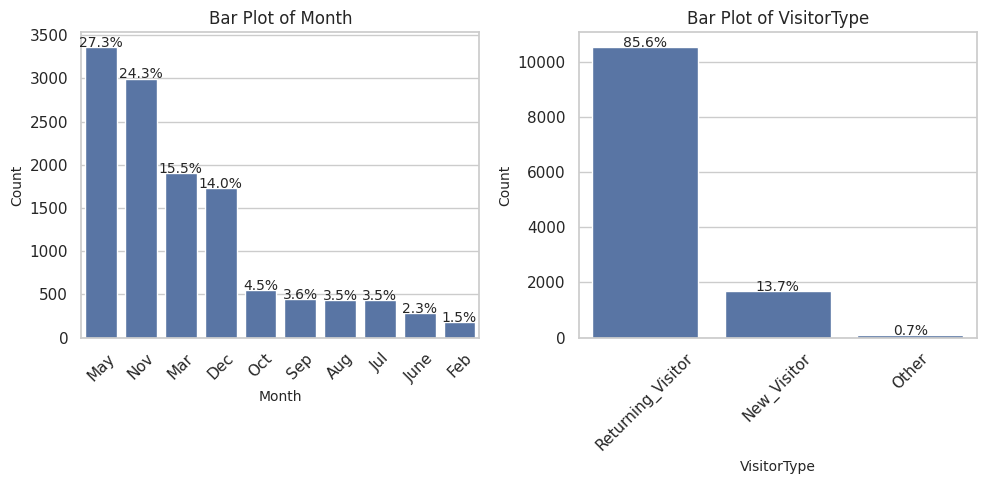

In [11]:
plot_categorical_distribution(data, categorical_columns)

Los resultados descriptivos para las características categóricas revelan patrones interesantes sobre el comportamiento de los usuarios. En el caso de la variable "Month", que representa el mes de la visita, se identificaron 10 meses únicos en los datos, con mayo destacándose como el mes con mayor cantidad de sesiones (3364). Esto sugiere un posible pico de actividad durante este mes, lo que podría estar relacionado con eventos específicos, promociones, o patrones estacionales en el comercio electrónico. La concentración de visitas en un solo mes indica que podrían existir oportunidades para optimizar las estrategias de marketing en otros períodos del año para mejorar el tráfico en meses menos activos.

Por otro lado, la variable "VisitorType" refleja tres tipos de usuarios únicos, siendo "Returning Visitor" la categoría predominante con 10,551 registros. Esto significa que la mayoría de los visitantes son recurrentes, lo que podría ser un indicativo positivo de lealtad o familiaridad con la plataforma. Sin embargo, este predominio también sugiere que hay un margen de mejora para atraer nuevos usuarios al sitio. Los datos de visitantes nuevos y otros tipos de usuarios pueden ser clave para diseñar estrategias enfocadas en expandir la base de clientes y fomentar su conversión en visitantes recurrentes.

In [12]:
# Compute correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Filter for correlations with "Revenue"
revenue_correlation = correlation_matrix['Revenue'].sort_values(ascending=False)

# Display the top correlations with Revenue
print("Correlaciones con la variable Revenue:")
print(revenue_correlation)

Correlaciones con la variable Revenue:
Revenue                    1.000000
PageValues                 0.492569
ProductRelated             0.158538
ProductRelated_Duration    0.152373
Administrative             0.138917
Informational              0.095200
Administrative_Duration    0.093587
Informational_Duration     0.070345
Weekend                    0.029295
Browser                    0.023984
TrafficType               -0.005113
Region                    -0.011595
OperatingSystems          -0.014668
SpecialDay                -0.082305
BounceRates               -0.150673
ExitRates                 -0.207071
Name: Revenue, dtype: float64


<ipython-input-13-fcaa19d2362b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_correlations.values, y=top_correlations.index, palette='viridis')


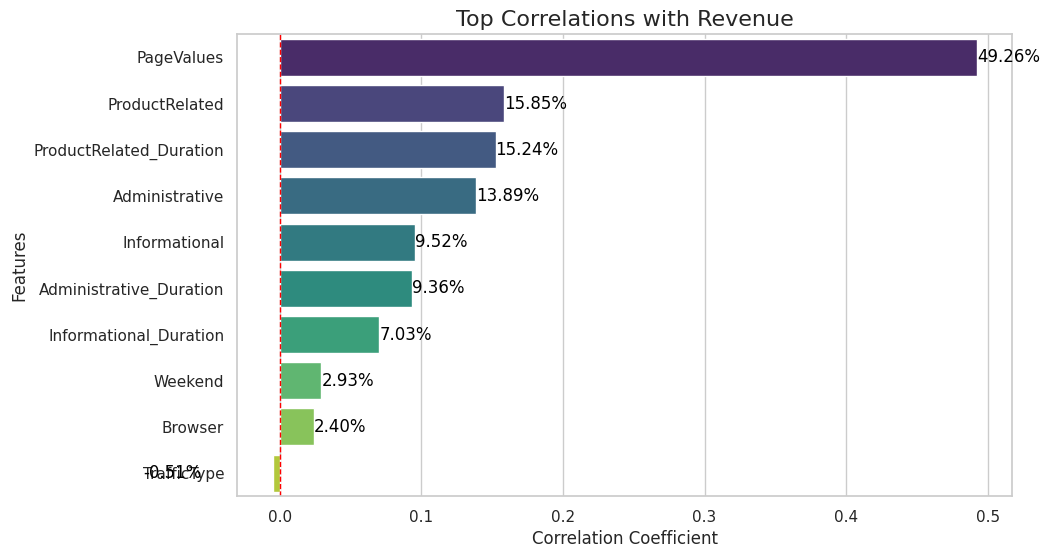

In [13]:
# Remove 'Revenue' from the correlations if it's present
top_correlations = revenue_correlation.drop('Revenue').head(10)

# Plot the top correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_correlations.values, y=top_correlations.index, palette='viridis')
plt.title('Top Correlations with Revenue', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.axvline(0, color='red', linestyle='--', linewidth=1)

# Annotate percentages
for index, value in enumerate(top_correlations.values):
    plt.text(value if value > 0 else value - 0.05,  # Adjust positioning for negative values
             index,
             f"{value * 100:.2f}%",  # Convert to percentage
             color="black",
             va="center",
             ha="right" if value < 0 else "left")  # Align text based on sign

plt.show()

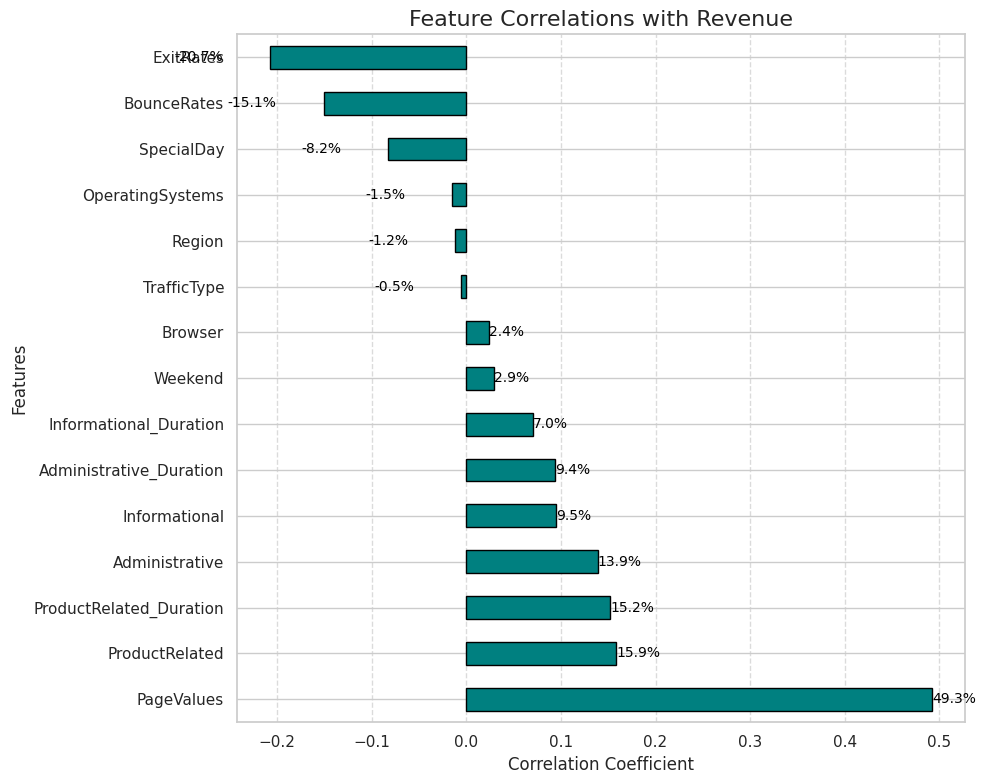

In [14]:
plt.figure(figsize=(10, 8))

# Drop 'Revenue' for this visualization
correlations = revenue_correlation.drop('Revenue')

# Create the horizontal bar plot
ax = correlations.plot(kind='barh', color='teal', edgecolor='black')

plt.title('Feature Correlations with Revenue', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate percentages
for index, value in enumerate(correlations.values):
    # Adjust placement for negative values and annotate accordingly
    text_x_position = value if value > 0 else value - 0.05
    plt.text(text_x_position,
             index,
             f"{value * 100:.1f}%",  # Show one decimal place for cleaner display
             color="black",
             va="center",
             ha="right" if value < 0 else "left",  # Adjust text alignment based on sign
             fontsize=10)

# Automatically adjust the layout to avoid overlapping text and labels
plt.tight_layout()

# Show the plot
plt.show()


El análisis de correlaciones revela que las páginas relacionadas con productos y el tiempo dedicado a explorarlas son los factores más influyentes para generar ingresos en el sitio de comercio electrónico. Variables como PageValues tienen la correlación positiva más alta con el atributo Revenue, indicando que las páginas con mayor valor promedio están estrechamente relacionadas con las transacciones exitosas. Asimismo, las métricas asociadas al contenido explorado, como ProductRelated y ProductRelated_Duration, también muestran correlaciones moderadas, subrayando que el interés en productos específicos impulsa las compras. Otras categorías, como las páginas administrativas o informativas, aunque menos relevantes, aportan de manera positiva en menor medida.

Por otro lado, variables como BounceRates y ExitRates presentan correlaciones negativas significativas, reflejando que una mayor tasa de rebote o abandono disminuye la probabilidad de conversión. Estas métricas indican áreas clave que deben optimizarse para mejorar la experiencia del usuario y fomentar interacciones más prolongadas. Aunque otras variables, como Weekend, Region, o TrafficType, tienen una relación débil o nula con los ingresos, podrían complementar el análisis en contextos específicos. En general, los resultados sugieren que las estrategias para maximizar ingresos deben centrarse en optimizar las páginas relacionadas con productos, reducir las tasas de abandono y destacar el valor percibido de las páginas más influyentes.

In [15]:
# Distribution of target variable
print("\nDistribución de la variable objetivo:")
print(data[y.columns[0]].value_counts())


Distribución de la variable objetivo:
Revenue
0    10422
1     1908
Name: count, dtype: int64


In [16]:
# Distribución porcentual de la variable objetivo
print("\nDistribución de la variable objetivo (porcentajes):")
target_distribution_percentage = data[y.columns[0]].value_counts(normalize=True) * 100
print(target_distribution_percentage)


Distribución de la variable objetivo (porcentajes):
Revenue
0    84.525547
1    15.474453
Name: proportion, dtype: float64


La distribución de la variable objetivo Revenue muestra un desequilibrio significativo en los datos. La mayoría de los registros (10422) tienen un valor de 0, lo que representa el 84.53% de los usuarios que no realizaron una compra o conversión en el sitio. Por otro lado, solo una fracción de los usuarios (1908) realizó una compra, lo que corresponde al 15.47% de los registros, reflejando el valor 1 de la variable, que representa la conversión o acción deseada. Este desbalance en la distribución es importante a tener en cuenta, ya que las estrategias de modelado y las métricas de evaluación deben considerar la alta proporción de no conversiones, lo que podría requerir técnicas especiales como el ajuste de clases o el uso de métricas específicas para tratar con clases desbalanceadas.

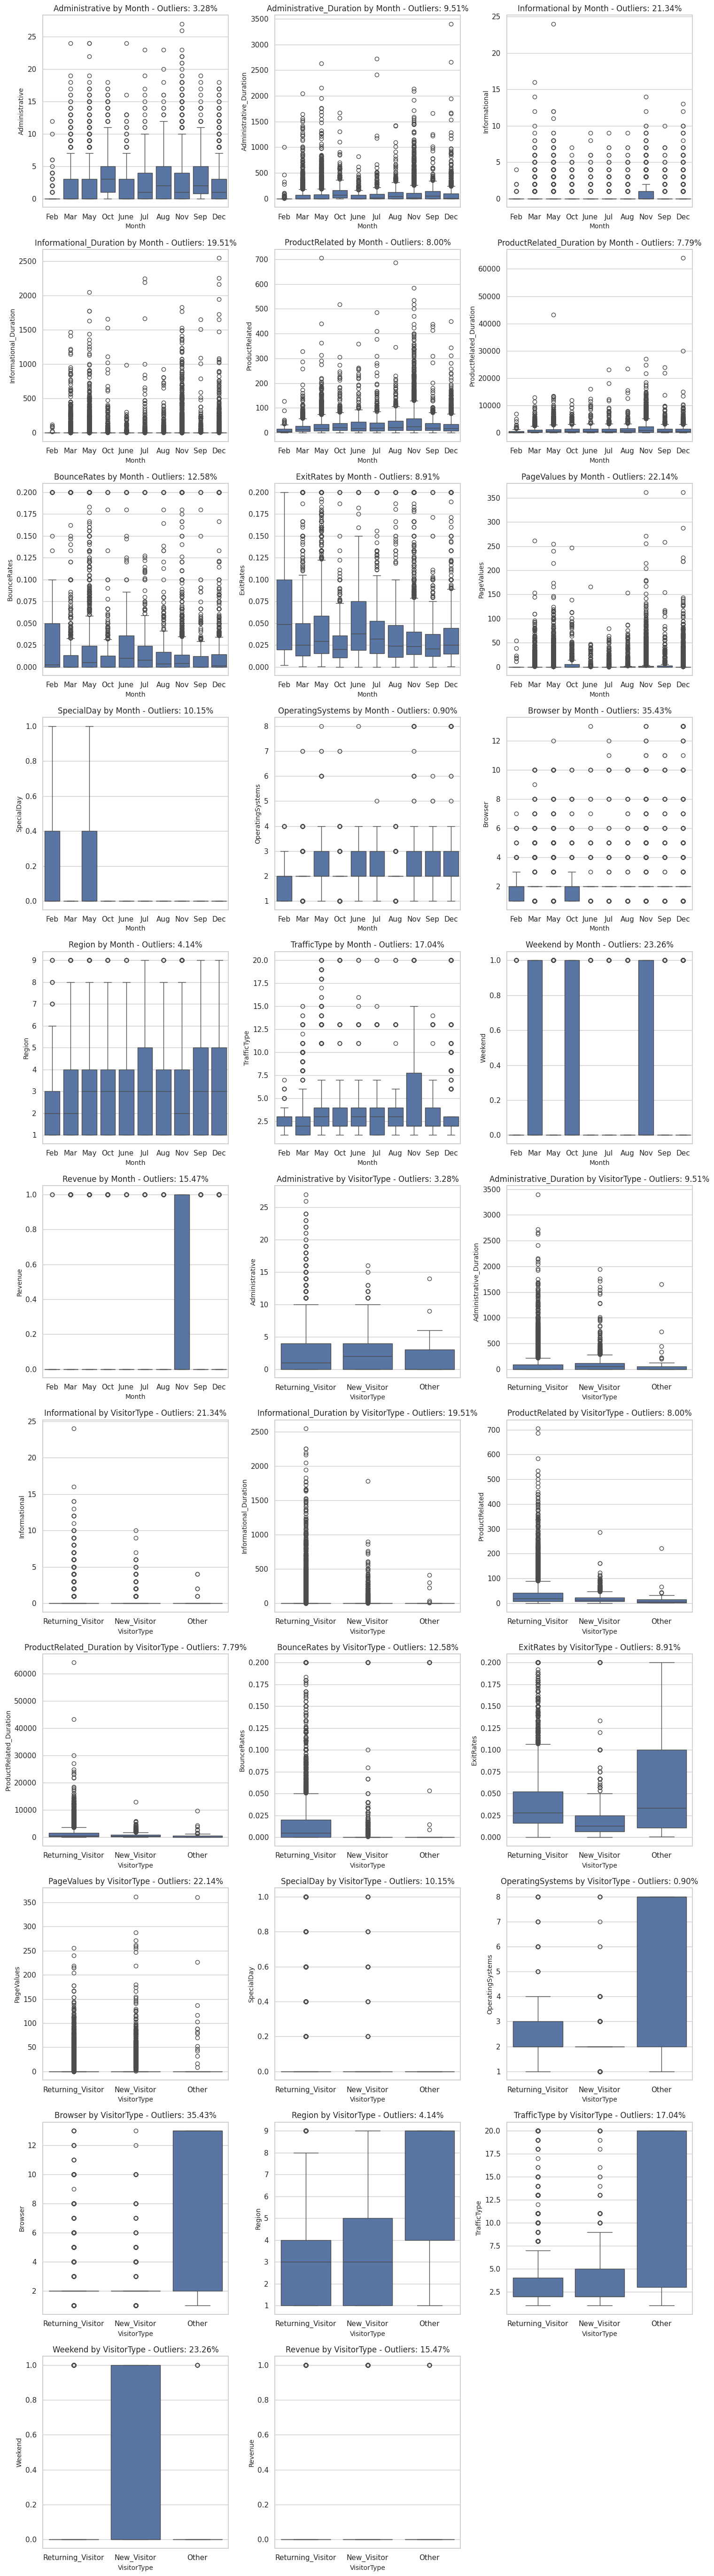

Outlier Percentages for Each Graph:
Administrative by Month: 3.28%
Administrative_Duration by Month: 9.51%
Informational by Month: 21.34%
Informational_Duration by Month: 19.51%
ProductRelated by Month: 8.00%
ProductRelated_Duration by Month: 7.79%
BounceRates by Month: 12.58%
ExitRates by Month: 8.91%
PageValues by Month: 22.14%
SpecialDay by Month: 10.15%
OperatingSystems by Month: 0.90%
Browser by Month: 35.43%
Region by Month: 4.14%
TrafficType by Month: 17.04%
Weekend by Month: 23.26%
Revenue by Month: 15.47%
Administrative by VisitorType: 3.28%
Administrative_Duration by VisitorType: 9.51%
Informational by VisitorType: 21.34%
Informational_Duration by VisitorType: 19.51%
ProductRelated by VisitorType: 8.00%
ProductRelated_Duration by VisitorType: 7.79%
BounceRates by VisitorType: 12.58%
ExitRates by VisitorType: 8.91%
PageValues by VisitorType: 22.14%
SpecialDay by VisitorType: 10.15%
OperatingSystems by VisitorType: 0.90%
Browser by VisitorType: 35.43%
Region by VisitorType: 4.1

In [17]:
# Set a modern style
sns.set_theme(style="whitegrid")

# Function to calculate outlier percentage based on IQR
def calculate_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_percentage = len(outliers) / len(df) * 100
    return outlier_percentage

# Dictionary to store outlier percentages for each combination
outlier_results = {}

# Create subplots for better visualization
n_cols = 3  # Number of columns in the grid
n_rows = int(np.ceil(len(categorical_columns) * len(numerical_columns) / n_cols))  # Calculate number of rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten for easy indexing

# Plot boxplots for each combination of categorical and numerical columns
plot_idx = 0
for cat_col in categorical_columns:
    for num_col in numerical_columns:
        ax = axes[plot_idx]
        # Plot boxplot
        sns.boxplot(x=data[cat_col], y=data[num_col], ax=ax)
        # Calculate outlier percentage
        outlier_percentage = calculate_outliers(data, num_col)
        # Store the result in the dictionary
        outlier_results[f'{num_col} by {cat_col}'] = outlier_percentage
        ax.set_title(f'{num_col} by {cat_col} - Outliers: {outlier_percentage:.2f}%', fontsize=12)
        ax.set_xlabel(cat_col, fontsize=10)
        ax.set_ylabel(num_col, fontsize=10)
        plt.xticks(rotation=45)
        plot_idx += 1

# Remove empty subplots
for j in range(plot_idx, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Display the outlier percentages as a result
print("Outlier Percentages for Each Graph:")
for key, value in outlier_results.items():
    print(f"{key}: {value:.2f}%")


## Consulte en qué consiste el algoritmo de aprendizaje no supervisado DBSCAN. Mencione sus ventajas y desventajas en comparación con k-means.

### Algoritmo de Aprendizaje No Supervisado DBSCAN

### ¿Qué es DBSCAN?

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un algoritmo de agrupamiento no supervisado que identifica regiones densas de puntos de datos y las agrupa. A diferencia de otros algoritmos de agrupamiento como k-means, DBSCAN no requiere que se especifique el número de clústeres a priori. Se basa en dos parámetros principales:
1. **Epsilon (ε)**: el radio máximo de vecindad de un punto para considerarlo como parte del mismo clúster.
2. **MinPts**: el número mínimo de puntos requeridos para formar un clúster denso.

DBSCAN tiene la ventaja de poder identificar formas de clústeres arbitrarias y de manejar ruido (puntos que no pertenecen a ningún clúster). Los puntos de ruido no se asignan a ningún clúster, lo que es útil en conjuntos de datos con ruido o valores atípicos.

### Ventajas de DBSCAN
- **No requiere especificar el número de clústeres**: A diferencia de k-means, no es necesario definir cuántos grupos queremos identificar, lo que lo hace más flexible en ciertos contextos.
- **Detecta formas arbitrarias de clústeres**: DBSCAN puede identificar clústeres con formas no esféricas, lo que lo hace más adecuado cuando los datos no siguen una distribución uniforme.
- **Manejo de ruido y valores atípicos**: Los puntos que no pertenecen a ninguna vecindad densa se etiquetan como ruido y se excluyen del análisis. Esto es útil cuando se trabaja con datos ruidosos o con muchos valores atípicos.
  
### Desventajas de DBSCAN
- **Sensibilidad a los parámetros (ε y MinPts)**: La selección de los parámetros epsilon (ε) y MinPts puede ser complicada, y una mala elección de estos valores puede afectar el rendimiento del algoritmo.
- **Dificultad con datos de densidad variable**: DBSCAN puede tener problemas para detectar clústeres de diferentes densidades, ya que utiliza un umbral global (ε) para todos los puntos, lo que puede no ser adecuado en escenarios con densidades variadas.
- **Escalabilidad**: Aunque DBSCAN es más eficiente que otros algoritmos en algunos casos, con grandes conjuntos de datos, su complejidad puede volverse alta, especialmente si se usa un enfoque de fuerza bruta para calcular las distancias entre puntos.

### Comparación con k-means

| Característica                 | DBSCAN                                  | K-means                               |
|---------------------------------|-----------------------------------------|---------------------------------------|
| **Número de clústeres**         | No es necesario especificarlo          | Debe ser especificado previamente     |
| **Forma de los clústeres**      | Puede identificar formas arbitrarias   | Solo identifica clústeres esféricos   |
| **Manejo de ruido**             | Puede detectar y excluir ruido          | No maneja explícitamente el ruido    |
| **Sensibilidad a los parámetros**| Sensible a los parámetros ε y MinPts   | Sensible a la inicialización de los centros |
| **Escalabilidad**               | Puede ser más lento con grandes datos  | Generalmente más rápido y eficiente  |

### Aplicación en el Contexto del Conjunto de Datos "Online Shoppers Purchasing Intention"

En el contexto del conjunto de datos **Online Shoppers Purchasing Intention**, el objetivo principal es identificar patrones de comportamiento similares entre los clientes para permitir decisiones de marketing personalizadas. **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) es especialmente útil para este propósito, ya que puede identificar segmentos de clientes con comportamientos similares sin necesidad de conocer de antemano cuántos segmentos existen. Además, DBSCAN tiene la ventaja de manejar eficientemente los puntos de datos ruidosos o atípicos, como aquellos clientes cuyo comportamiento de compra es inusual, sin que estos afecten los clústeres principales.

Por ejemplo, **DBSCAN** podría identificar los siguientes grupos:

- **Clústeres de clientes frecuentes** que muestran una alta tasa de conversión, lo que podría indicar que estos usuarios están más comprometidos y tienen una alta probabilidad de realizar compras.
- **Clientes de bajo compromiso** que no realizan compras pero navegan mucho por el sitio web. Estos clientes podrían ser identificados por su alta interacción con el contenido, pero sin completar transacciones.
- **Clientes con comportamiento atípico**, como aquellos que visitan muchas páginas pero nunca compran, lo cual podría indicar problemas con la usabilidad del sitio o un comportamiento inusual.

### Descripción de Variables Relevantes

En este contexto, las variables del conjunto de datos que resultan clave para el análisis con DBSCAN incluyen:

- **"Administrative"**, **"Administrative Duration"**, **"Informational"**, **"Informational Duration"**, **"Product Related"** y **"Product Related Duration"**: Estas variables representan el número de páginas de diferentes tipos visitadas por el usuario durante su sesión y el tiempo total pasado en cada tipo de página. Estas métricas se actualizan en tiempo real cuando un usuario interactúa con el sitio web, permitiendo identificar su comportamiento en cada tipo de contenido del sitio.
  
- **"Bounce Rate"**, **"Exit Rate"** y **"Page Value"**: Estas son métricas provenientes de **Google Analytics** que proporcionan información sobre cómo los usuarios interactúan con las páginas del sitio web.
  - **Bounce Rate** indica el porcentaje de usuarios que abandonan el sitio después de visitar una página, sin realizar más interacciones en la misma sesión.
  - **Exit Rate** mide el porcentaje de usuarios que salen del sitio después de visitar una página específica.
  - **Page Value** representa el valor promedio de las páginas visitadas por los usuarios antes de completar una transacción.

- **"Special Day"**: Esta característica refleja la cercanía de la visita a un día especial (como el Día de San Valentín o el Día de la Madre), en los cuales es más probable que las visitas se conviertan en transacciones. El valor de este atributo varía dependiendo de la proximidad al evento especial, permitiendo identificar patrones de comportamiento relacionados con fechas clave para las ventas.

- **Otras variables**: El conjunto de datos también incluye detalles como el sistema operativo, el navegador, la región, el tipo de tráfico, el tipo de visitante (nuevo o recurrente), un indicador booleano que señala si la visita ocurrió durante el fin de semana, y el mes del año. Estos atributos ofrecen información adicional que puede ser útil para segmentar a los usuarios en función de su comportamiento y características demográficas.

### Conclusión

DBSCAN es una excelente opción para segmentar a los clientes según su comportamiento de compra en este conjunto de datos, ya que no requiere especificar el número de segmentos de antemano y es resistente al ruido y los valores atípicos. Al aprovechar variables como la duración de la sesión en diferentes tipos de páginas, las tasas de rebote y salida, y el valor de las páginas visitadas, DBSCAN puede ayudar a identificar segmentos valiosos de clientes con patrones de comportamiento similares, lo que permitirá a las áreas de marketing tomar decisiones más informadas y personalizadas.


## Aplique ambos algoritmos a los datos disponibles. Presente los resultados obtenidos y determine la mejor agrupación según las métricas

In [18]:
# Preprocess the data (drop non-numeric and relevant columns)
data = pd.get_dummies(data, drop_first=True)  # One-hot encoding for categorical columns

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

Optimal K based on Silhouette Score: 16


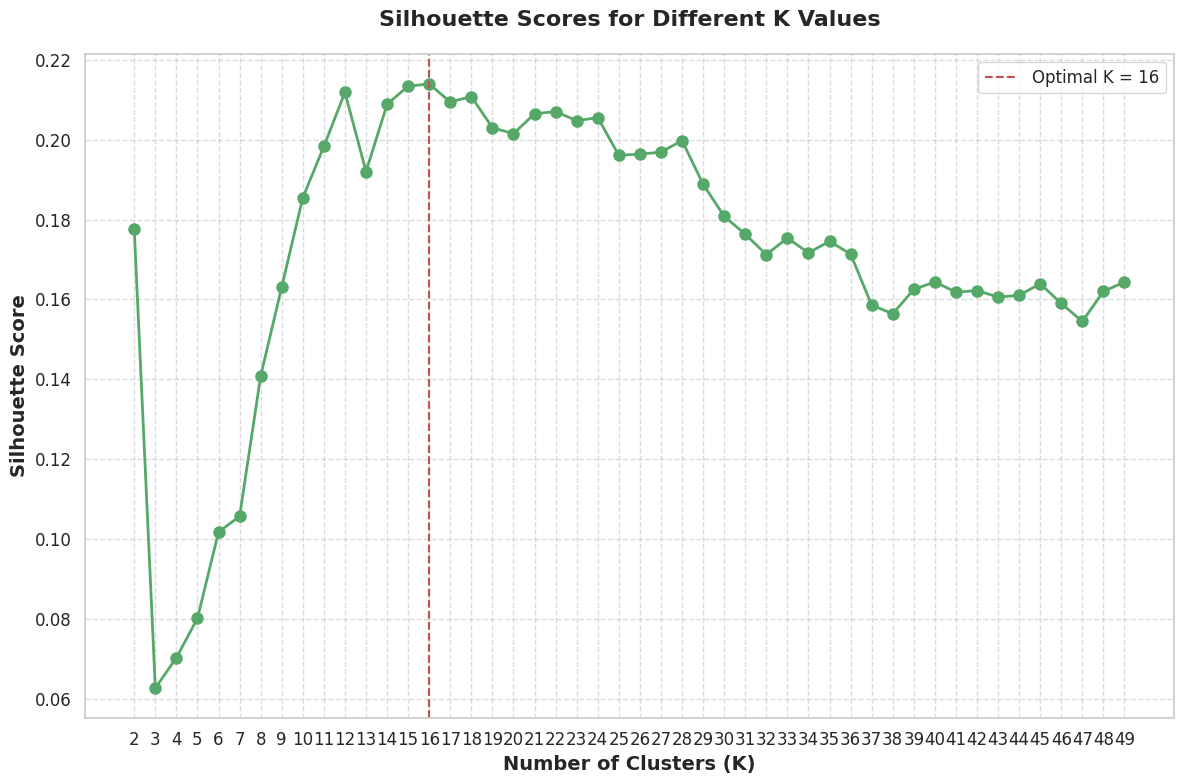

K-Means Silhouette Score for optimal K: 0.2139


In [19]:
# Initialize variables
silhouette_scores = []
k_range = range(2, 50)  # We start from 2 because silhouette score is undefined for 1 cluster

# Grid search over different K values
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, kmeans_labels)
    silhouette_scores.append(score)

# Identify the optimal K based on the highest silhouette score
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal K based on Silhouette Score: {optimal_k}")

plt.figure(figsize=(12, 8))  # Increased size for better readability
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='g', markersize=8, linewidth=2)
plt.title('Silhouette Scores for Different K Values', fontsize=16, weight='bold', pad=20)
plt.xlabel('Number of Clusters (K)', fontsize=14, weight='bold')
plt.ylabel('Silhouette Score', fontsize=14, weight='bold')
plt.xticks(k_range, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal K = {optimal_k}')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Train K-Means with the optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Calculate Silhouette Score for the final K-Means model
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)
print(f"K-Means Silhouette Score for optimal K: {kmeans_silhouette:.4f}")

La puntuación de Silueta es una métrica útil para evaluar la calidad de los clústeres generados por el algoritmo K-Means. Esta métrica mide qué tan bien están definidos los clústeres, con valores cercanos a 1 que indican una buena separación entre los grupos, valores cercanos a 0 que sugieren que los clústeres están poco diferenciados, y valores negativos que indican que los puntos podrían haber sido asignados a clústeres incorrectos. En los resultados proporcionados, se observa que la puntuación de Silueta mejora a medida que el valor de 𝐾
K aumenta, alcanzando su punto máximo en 𝐾 = 16, con una puntuación de 0.2139, lo que indica que los clústeres están bien definidos pero podrían mejorar.

Después de 𝐾 = 16, la puntuación de Silueta tiende a estabilizarse o disminuir ligeramente, lo que sugiere que agregar más clústeres no mejora significativamente la calidad de la segmentación. En general, el valor óptimo de 𝐾
K basado en la puntuación de Silueta es 𝐾 =
16, ya que este valor presenta la mejor puntuación de Silueta comparado con otros valores cercanos, como 𝐾 = 15 y 𝐾 = 17, cuyas puntuaciones son menores. Esto indica que 𝐾 = 16 proporciona el mejor equilibrio entre el número de clústeres y la calidad del agrupamiento.








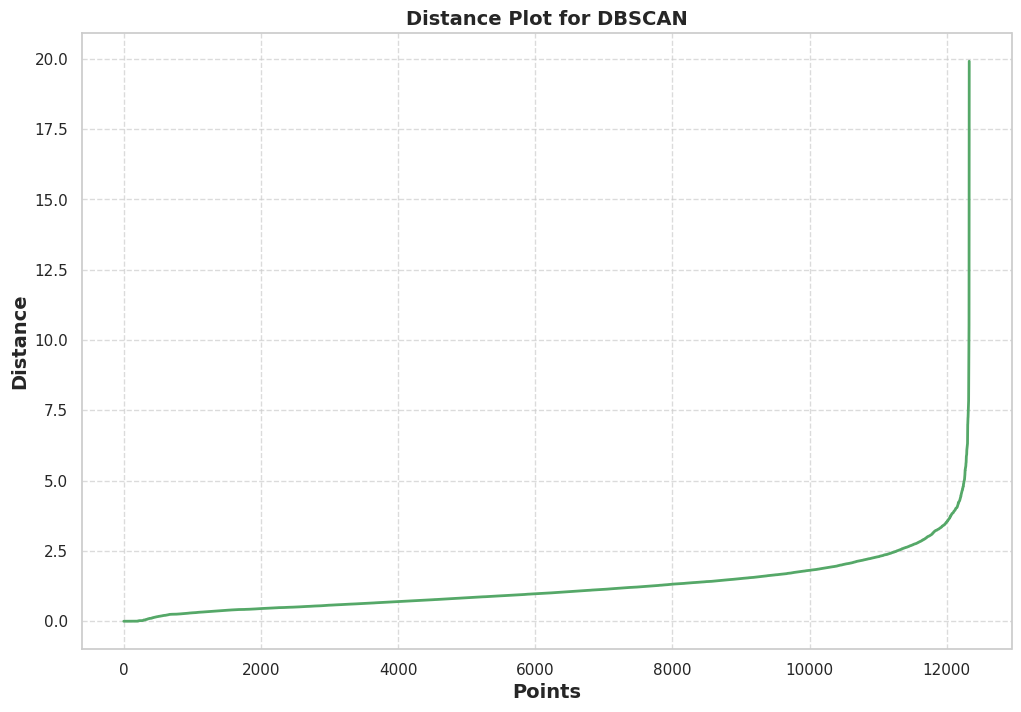

DBSCAN Silhouette Score: 0.4192


In [20]:
# 2. Apply DBSCAN
# Determine appropriate values for eps and min_samples
# Use Nearest Neighbors to estimate optimal eps value
neighbors = NearestNeighbors(n_neighbors=2)
neighbors.fit(data_scaled)
distances, indices = neighbors.kneighbors(data_scaled)
distances = np.sort(distances[:, 1], axis=0)

# Plot the distance to detect an optimal 'eps' value (the point of maximum curvature)
plt.figure(figsize=(12, 8))
plt.plot(distances, color='g', linewidth=2)
plt.title('Distance Plot for DBSCAN', fontsize=14, weight='bold')
plt.xlabel('Points', fontsize=14, weight='bold')  # Bold for better readability
plt.ylabel('Distance', fontsize=14, weight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Choose eps where the graph shows a sharp increase (e.g., eps=0.5)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)

# Calculate Silhouette Score for DBSCAN (consider only valid clusters)
valid_clusters_dbscan = dbscan_labels != -1  # Exclude outliers
dbscan_silhouette = silhouette_score(data_scaled[valid_clusters_dbscan], dbscan_labels[valid_clusters_dbscan])
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.4f}")

En este caso, los valores que se muestran representan las distancias de los puntos a su vecino más cercano o a los puntos del clúster al que pertenecen. En general, para DBSCAN, es mejor tener distancias más bajas, ya que los clústeres se definen como grupos de puntos cercanos entre sí, con alta densidad. Los puntos con distancias más bajas indican que están más cerca del centro de un clúster, lo que sugiere que son más representativos de ese grupo.

Por el contrario, los puntos con distancias más altas, como los valores que llegan hasta 14.75 y 19.92, son indicativos de outliers o puntos que no se ajustan bien a ningún clúster denso. Estos puntos se encuentran demasiado alejados de los clústeres principales y, por lo tanto, son considerados ruidos o puntos aislados. En términos de calidad del agrupamiento, una menor distancia entre los puntos dentro de un clúster es preferible, ya que señala una agrupación más coherente y compacta.

En resumen, para mejorar la calidad del modelo, se busca reducir la distancia entre los puntos dentro de cada clúster, lo que resulta en clústeres más densos y bien definidos. Si las distancias son demasiado altas, es probable que el modelo esté identificando puntos que no pertenecen adecuadamente a un clúster, lo que puede afectar negativamente la interpretación del modelo y la validación de los resultados. Esto se refleja en la puntuación de Silueta moderada de 0.419, ya que los clústeres no son completamente homogéneos y podrían incluir puntos con distancias relativamente grandes que no se ajustan bien a los demás puntos del clúster.

## Consulte en qué consiste la reducción de dimensionalidad mediante el algoritmo PCA.

La reducción de dimensionalidad mediante el Análisis de Componentes Principales (PCA) es una técnica estadística que transforma un conjunto de datos de alta dimensionalidad en un conjunto de datos de menor dimensión, sin perder demasiada información importante. Esto se logra encontrando las direcciones (llamadas componentes principales) en las que los datos varían más, y proyectando los datos sobre estas nuevas direcciones.

¿En qué consiste PCA?
PCA busca identificar las componentes principales de un conjunto de datos, que son combinaciones lineales de las características originales. Estas componentes principales son ordenadas por la cantidad de varianza que explican en los datos, de modo que la primera componente principal explica la mayor parte de la varianza, la segunda componente principal explica la segunda mayor varianza, y así sucesivamente.

En términos simples:

PCA reduce la dimensionalidad del conjunto de datos al transformarlo en un nuevo conjunto de variables (componentes) que son combinaciones lineales de las originales.
Las componentes principales se ordenan de tal manera que las primeras componentes explican la mayor parte de la variabilidad de los datos.
Pasos para aplicar PCA:
Estandarizar los datos: Es importante estandarizar los datos (es decir, hacer que cada característica tenga media cero y desviación estándar uno), ya que PCA es sensible a la escala de las variables.
Calcular la matriz de covarianza: Se calcula la matriz de covarianza para capturar las relaciones entre las diferentes variables.
Calcular los vectores propios y valores propios: Los vectores propios son las direcciones en las que los datos varían más, y los valores propios indican la cantidad de varianza explicada por cada vector propio.
Seleccionar las componentes principales: Se seleccionan las componentes principales que explican la mayor parte de la varianza, y los datos originales se proyectan sobre estas componentes.
¿Cómo puede ser útil PCA en nuestro contexto?
En el contexto de un análisis de clientes en el Online Shoppers Purchasing Intention Dataset, PCA puede ser útil para reducir la dimensionalidad de las características del conjunto de datos y mejorar la interpretación de los datos, así como la eficiencia de los algoritmos de clustering y clasificación.

Algunos beneficios específicos de PCA en este contexto incluyen:

Reducción de ruido y redundancia: PCA puede ayudar a eliminar características redundantes (altamente correlacionadas) y el ruido presente en los datos, lo que puede hacer que los modelos de aprendizaje automático sean más eficientes.

Mejor visualización de los datos: Si el conjunto de datos tiene muchas dimensiones, puede ser difícil visualizarlo. Al reducirlo a 2 o 3 componentes principales, puedes crear visualizaciones más claras para explorar los patrones de comportamiento de los clientes.

Mejora de la eficiencia en el clustering y clasificación: La reducción de dimensionalidad puede hacer que los algoritmos de clustering (como K-Means o DBSCAN) y de clasificación (como Random Forest) sean más rápidos y eficientes, ya que trabajan con un número reducido de variables sin perder mucha información importante.

Identificación de patrones significativos: Al proyectar los datos en las componentes principales, es posible identificar patrones o grupos de comportamiento de los clientes que no eran evidentes en el espacio de características original. Esto podría ayudar a identificar segmentos de clientes con comportamientos similares, lo que es útil para tomar decisiones de marketing personalizadas.

Ejemplo de Aplicación de PCA en Nuestro Contexto:
Imagina que tienes varias características numéricas, como "ProductRelated", "ProductRelatedDuration", "ExitRates", etc., que pueden estar correlacionadas entre sí. Usando PCA, podrías reducir el número de características de 10 o más a solo 2 o 3 componentes principales, que representen las relaciones más importantes entre las variables. Esto no solo facilita la visualización de los datos, sino que también mejora el rendimiento de los algoritmos de clustering, ya que no tienen que trabajar con tantas características redundantes.

Conclusión:
PCA es una herramienta valiosa cuando se trabaja con conjuntos de datos complejos y de alta dimensionalidad, como el Online Shoppers Purchasing Intention Dataset, ya que puede simplificar el análisis, mejorar la eficiencia de los modelos y revelar patrones significativos en los datos.

## Aplique nuevamente ambos algoritmos de agrupamiento posterior a la aplicación de PCA. Compare los resultados obtenidos sin la aplicación de PCA.

Optimal number of components based on Silhouette Score: 1
Best Silhouette Score: 0.5214


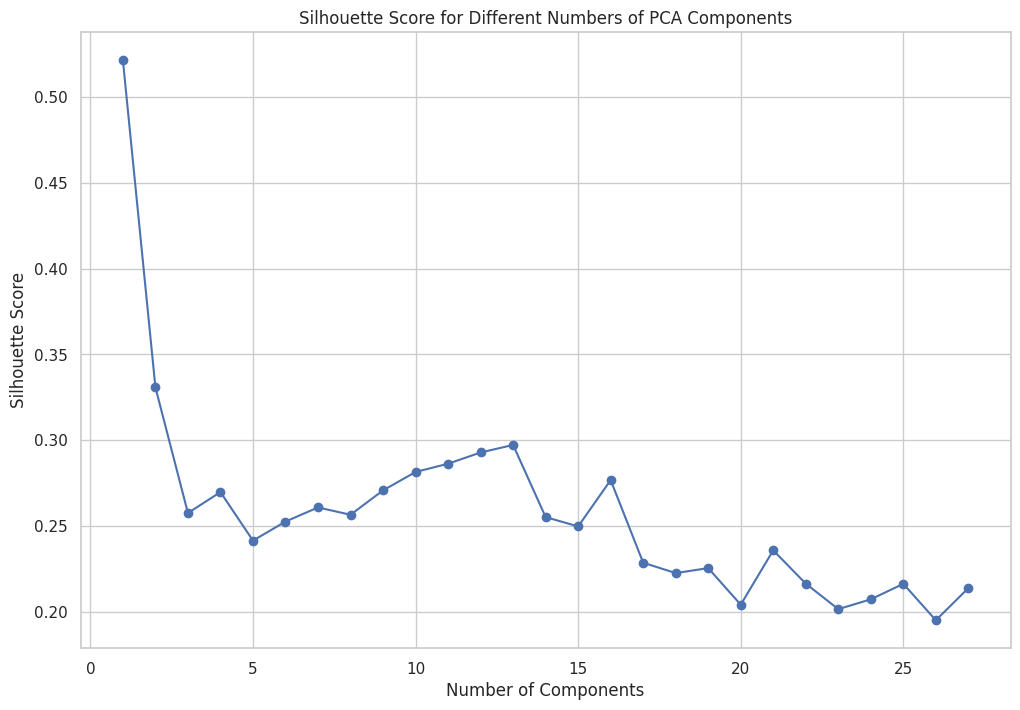

In [21]:
# Initialize variables
silhouette_scores_pca = []
components_range = range(1, data_scaled.shape[1] + 1)

# Loop through different values of n_components for PCA
for n_components in components_range:
    # Apply PCA with n_components
    pca = PCA(n_components=n_components)
    data_pca = pca.fit_transform(data_scaled)

    # Fit KMeans on the PCA-reduced data
    kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42)
    labels_pca = kmeans_pca.fit_predict(data_pca)

    # Calculate the Silhouette Score for PCA-reduced data
    silhouette_pca = silhouette_score(data_pca, labels_pca)
    silhouette_scores_pca.append(silhouette_pca)

# Identify the optimal number of components based on Silhouette Score
optimal_components = components_range[silhouette_scores_pca.index(max(silhouette_scores_pca))]
optimal_silhouette_score = max(silhouette_scores_pca)

print(f"Optimal number of components based on Silhouette Score: {optimal_components}")
print(f"Best Silhouette Score: {optimal_silhouette_score:.4f}")

# Optionally, plot the Silhouette Scores for different number of components
plt.figure(figsize=(12, 8))
plt.plot(components_range, silhouette_scores_pca, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score for Different Numbers of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [22]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Fit KMeans on original data
kmeans_original = KMeans(n_clusters=optimal_k, random_state=42)
labels_original = kmeans_original.fit_predict(data_scaled)

# Fit KMeans on PCA-reduced data
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42)
labels_pca = kmeans_pca.fit_predict(data_pca)

# Silhouette Score for original data
silhouette_original = silhouette_score(data_scaled, labels_original)

# Silhouette Score for PCA-reduced data
silhouette_pca = silhouette_score(data_pca, labels_pca)

print(f"K_means Silhouette Score (Original Data): {silhouette_original:.4f}")
print(f"K_means Silhouette Score (PCA Data): {silhouette_pca:.4f}")

K_means Silhouette Score (Original Data): 0.2139
K_means Silhouette Score (PCA Data): 0.3308


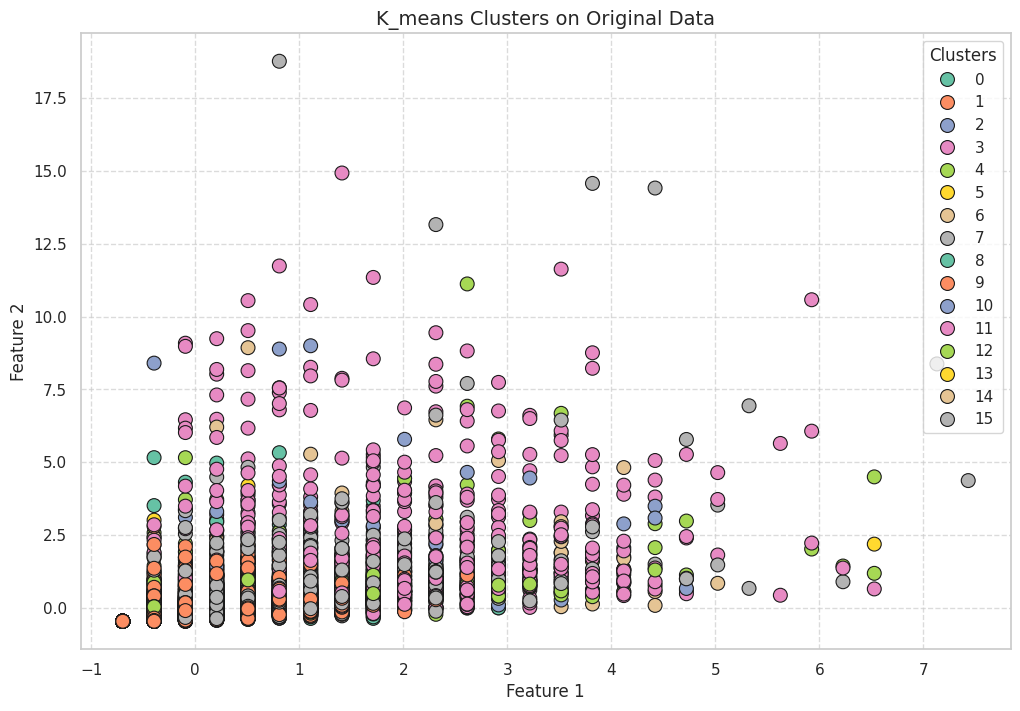

In [23]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=data_scaled[:, 0],
    y=data_scaled[:, 1],
    hue=labels_original,
    palette="Set2",
    s=100,
    edgecolor='k',
    marker='o'
)
plt.title('K_means Clusters on Original Data', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.legend(title='Clusters', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

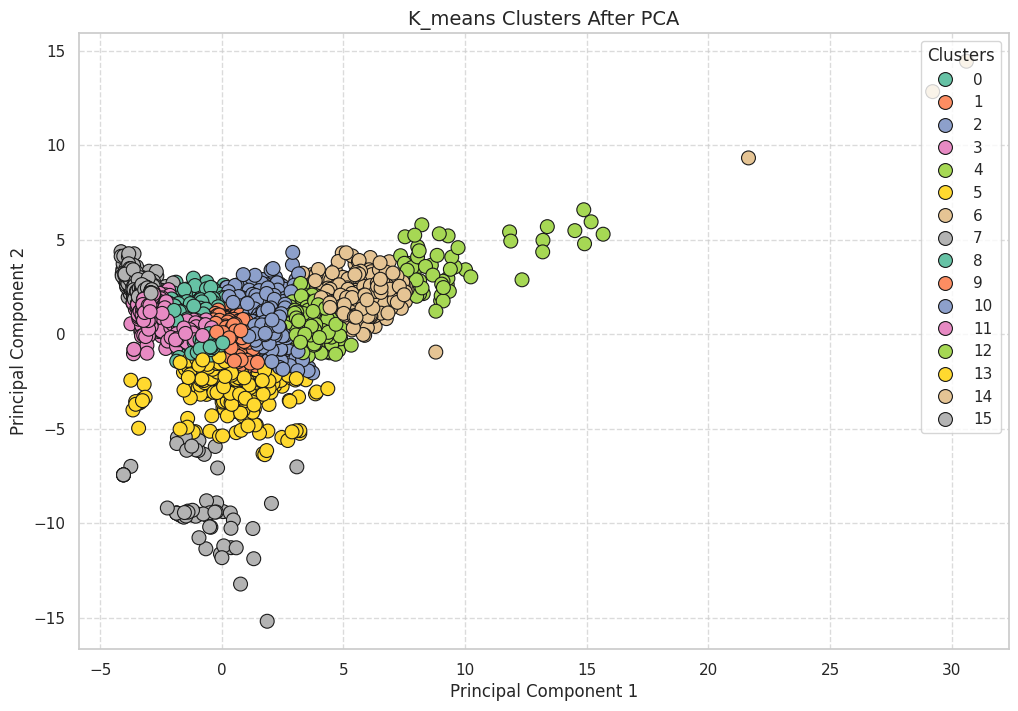

In [24]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=data_pca[:, 0],
    y=data_pca[:, 1],
    hue=labels_pca,
    palette="Set2",
    s=100,
    edgecolor='k',
    marker='o'
)
plt.title('K_means Clusters After PCA', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Clusters', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [31]:
# Step 1: Preprocess Data
features = data.drop(columns=['Revenue'])
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 2: Apply PCA to retain 90% of the variance
pca = PCA(n_components=0.9)
data_pca = pca.fit_transform(features_scaled)

# Helper function to apply DBSCAN and calculate silhouette score
def apply_dbscan_and_silhouette(data, eps=0.2, min_samples=2):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(data)
    valid_clusters = dbscan_labels != -1  # Exclude outliers (labeled as -1)
    silhouette = silhouette_score(data[valid_clusters], dbscan_labels[valid_clusters]) if valid_clusters.sum() > 0 else -1
    return dbscan_labels, silhouette

# Step 3: Apply DBSCAN to original data
dbscan_labels_original, silhouette_dbscan_original = apply_dbscan_and_silhouette(features_scaled)
print(f"DBSCAN Silhouette Score (Original Data): {silhouette_dbscan_original:.4f}")

# Step 4: Apply DBSCAN to PCA-transformed data
dbscan_labels_pca, silhouette_dbscan_pca = apply_dbscan_and_silhouette(data_pca)
print(f"DBSCAN Silhouette Score (PCA Data): {silhouette_dbscan_pca:.4f}")

DBSCAN Silhouette Score (Original Data): 0.8720
DBSCAN Silhouette Score (PCA Data): 0.8426


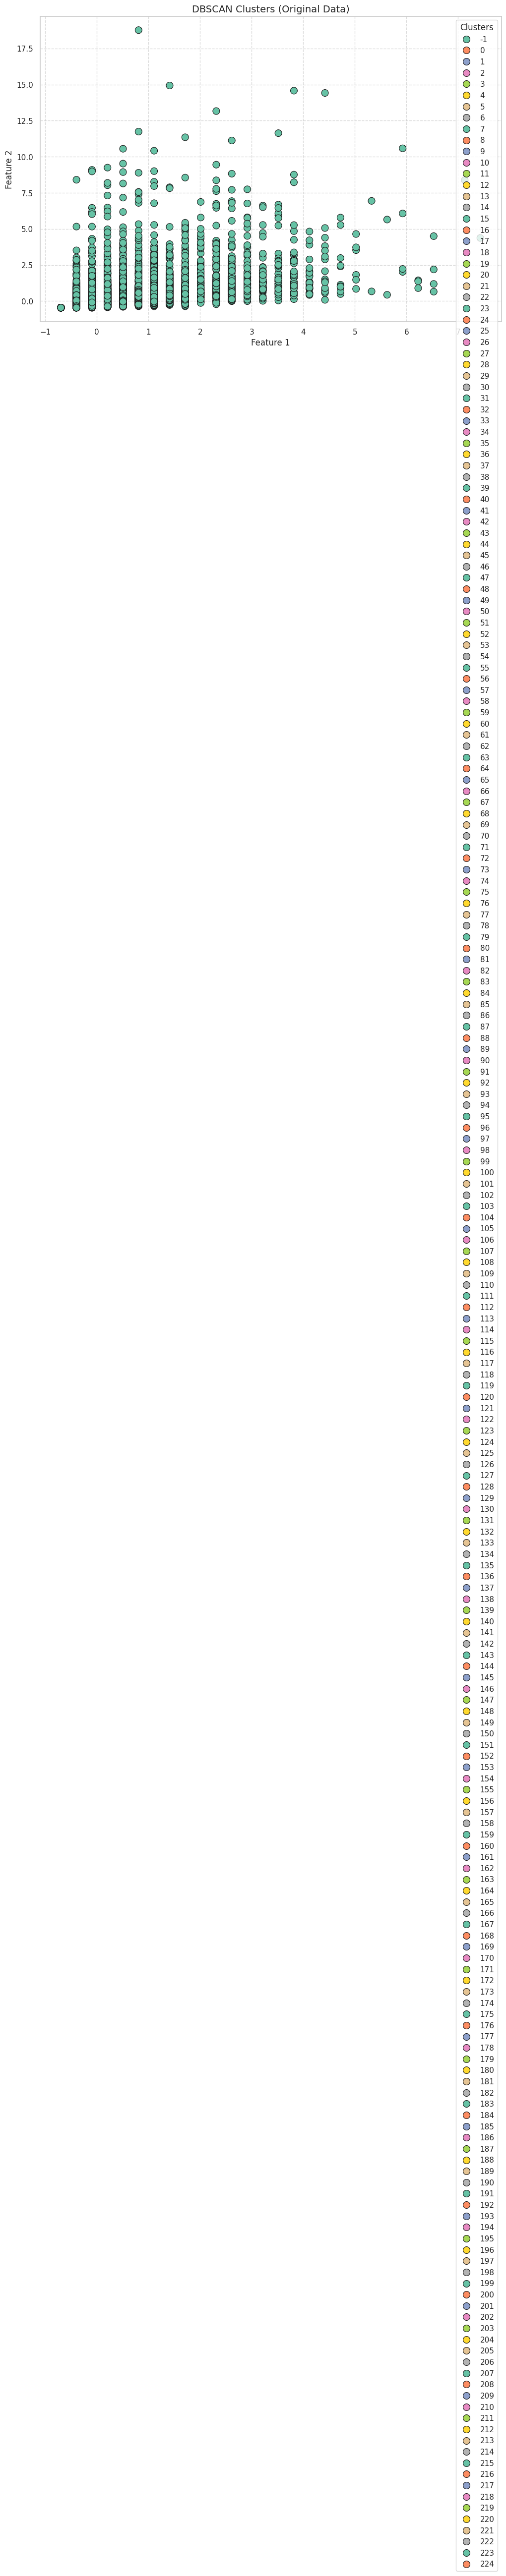

In [32]:
# Step 5: Plot DBSCAN Clusters - Original Data
plt.figure(figsize=(12, 8))

sns.scatterplot(
    x=features_scaled[:, 0],  # First feature
    y=features_scaled[:, 1],  # Second feature
    hue=dbscan_labels_original,  # Cluster labels from DBSCAN
    palette="Set2",  # Color palette for clusters
    s=100,  # Marker size
    edgecolor='k',  # Marker edge color
    marker='o'  # Marker style
)

plt.title('DBSCAN Clusters (Original Data)', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.legend(title='Clusters', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
# Assuming 'dbscan_labels_pca' is the cluster labels and 'data_pca' is your PCA-transformed data
cluster_data = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(data_pca.shape[1])])
cluster_data['Cluster'] = dbscan_labels_pca

# Assuming 'revenue' is part of your dataset, you might calculate the average revenue per cluster
cluster_data['Revenue'] = data['Revenue'].values

# Group by cluster and calculate the average revenue for each
cluster_avg_revenue_sorted = cluster_data.groupby('Cluster').agg({'Revenue': 'mean'}).reset_index()

# Sort by revenue (descending order, for example)
cluster_avg_revenue_sorted = cluster_avg_revenue_sorted.sort_values(by='Revenue', ascending=False)
plt.show()

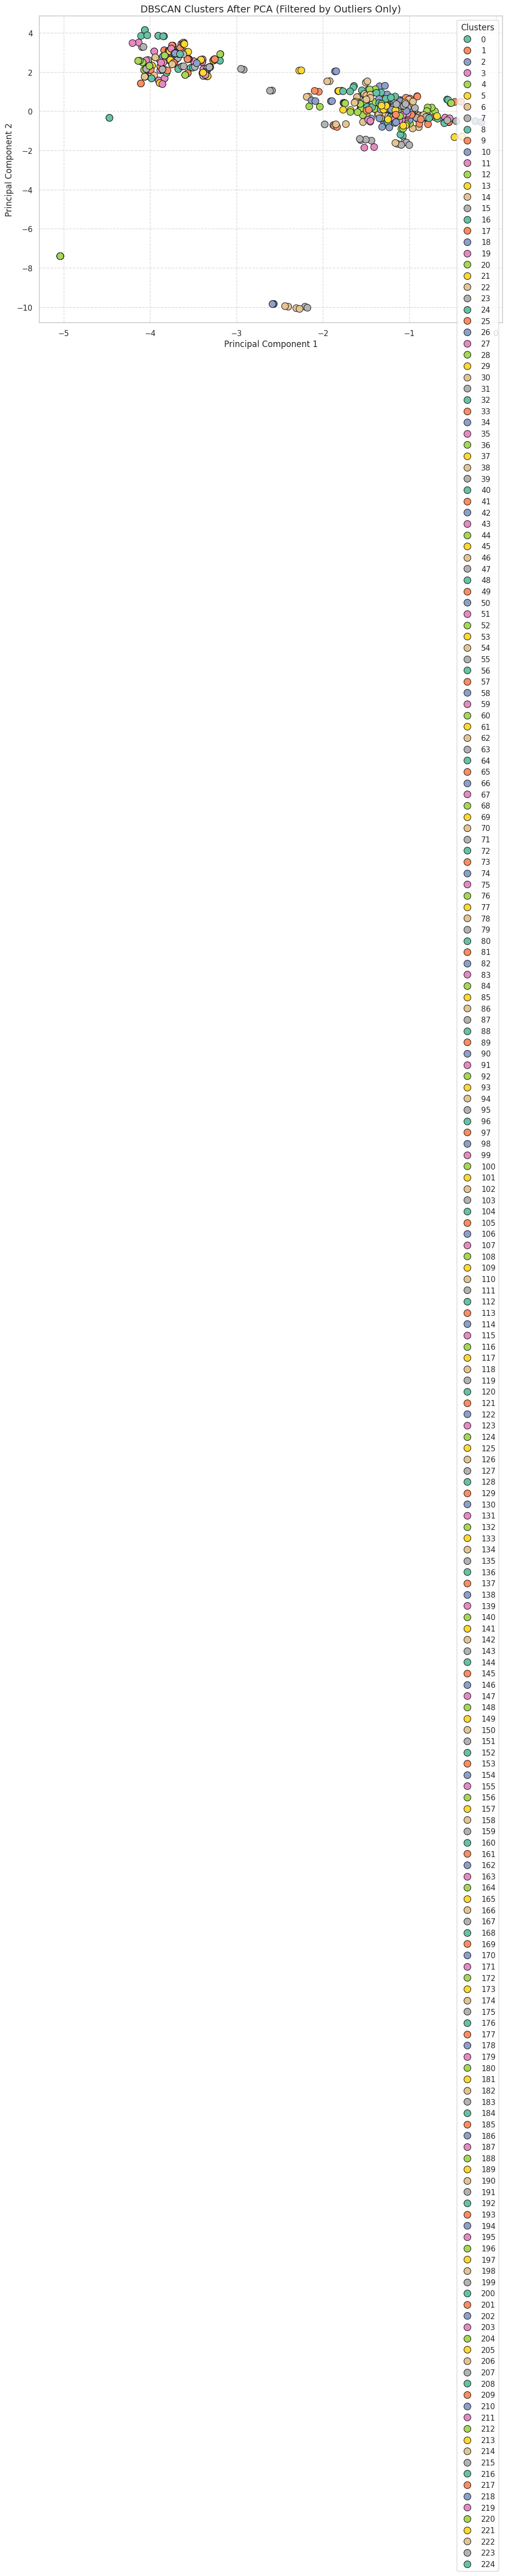

In [33]:
# Apply DBSCAN to the original data for cluster assignment
data['Cluster'] = dbscan_labels_original

# Calculate average revenue for each cluster using the original data
cluster_avg_revenue_sorted = data.groupby('Cluster')['Revenue'].mean().reset_index().sort_values(by='Revenue', ascending=False)

# Filter out the outliers (label -1) from DBSCAN
valid_clusters_mask = dbscan_labels_original != -1
valid_clusters = dbscan_labels_original[valid_clusters_mask]
filtered_data_pca = data_pca[valid_clusters_mask]

# Plot DBSCAN clusters in PCA-reduced space using seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=filtered_data_pca[:, 0],  # First Principal Component
    y=filtered_data_pca[:, 1],  # Second Principal Component
    hue=valid_clusters,  # Cluster labels from DBSCAN
    palette="Set2",  # Color palette for clusters
    s=100,  # Marker size
    edgecolor='k',  # Marker edge color
    marker='o'  # Marker style
)

# Customize plot with title, labels, and legend
plt.title('DBSCAN Clusters After PCA (Filtered by Outliers Only)', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Clusters', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


## A partir de los resultados obtenidos, elabore recomendaciones dirigidas al área de mercadeo relacionadas con la segmentación de mercado.

In [34]:
# Identify high-value clusters (e.g., clusters with higher "Revenue" or "Page Value")
cluster_centers = kmeans_pca.cluster_centers_

# Use the cluster centers to analyze which clusters represent higher "Revenue" or "Page Value"
# Example: Assuming 'Revenue' is the target variable in the dataset
revenue_by_cluster = []
for i in range(optimal_k):
    cluster_data = data_scaled[labels_pca == i]
    cluster_revenue = data['Revenue'][labels_pca == i].mean()
    revenue_by_cluster.append((i, cluster_revenue))

# Sort clusters by average revenue
revenue_by_cluster.sort(key=lambda x: x[1], reverse=True)
print("Clusters sorted by average revenue using K-means:")
for cluster, revenue in revenue_by_cluster:
    print(f"Cluster {cluster}: Avg Revenue = {revenue:.4f}")

Clusters sorted by average revenue using K-means:
Cluster 5: Avg Revenue = 0.8966
Cluster 4: Avg Revenue = 0.4727
Cluster 12: Avg Revenue = 0.4088
Cluster 10: Avg Revenue = 0.4056
Cluster 9: Avg Revenue = 0.3969
Cluster 6: Avg Revenue = 0.2955
Cluster 13: Avg Revenue = 0.2358
Cluster 7: Avg Revenue = 0.2344
Cluster 1: Avg Revenue = 0.0471
Cluster 8: Avg Revenue = 0.0430
Cluster 2: Avg Revenue = 0.0282
Cluster 3: Avg Revenue = 0.0052
Cluster 11: Avg Revenue = 0.0049
Cluster 0: Avg Revenue = 0.0033
Cluster 14: Avg Revenue = 0.0000
Cluster 15: Avg Revenue = 0.0000


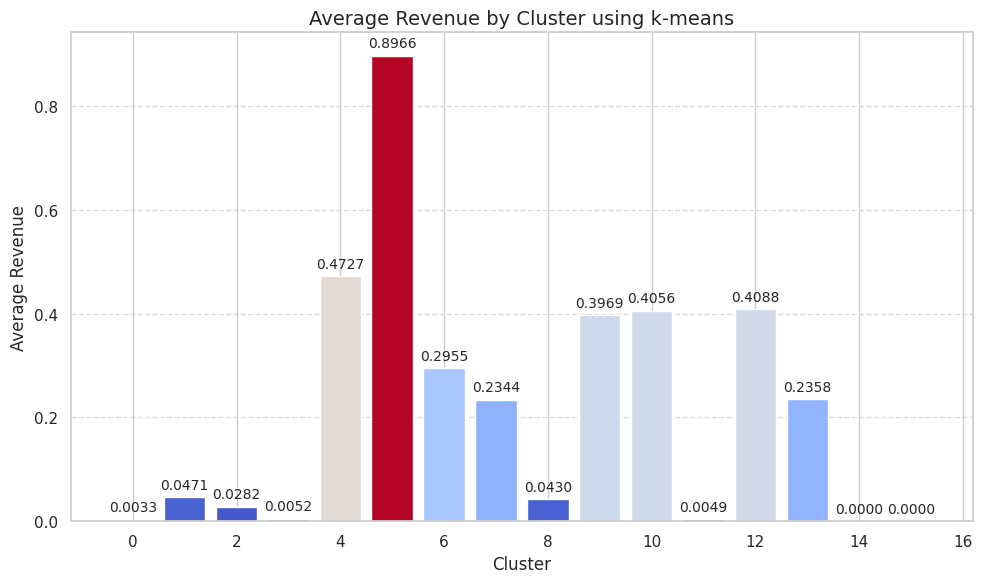

In [35]:
# Prepare the data for plotting
clusters, revenues = zip(*revenue_by_cluster)

# Create the bar plot with color gradient
fig, ax = plt.subplots(figsize=(10, 6))

# Use a colormap to color the bars based on revenue (higher revenue = darker color)
cmap = plt.get_cmap('coolwarm')
norm = plt.Normalize(min(revenues), max(revenues))
colors = [cmap(norm(revenue)) for revenue in revenues]

bars = ax.bar(clusters, revenues, color=colors)

# Add labels above the bars for the exact revenue
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom', fontsize=10)

# Add labels and title
ax.set_xlabel('Cluster', fontsize=12)
ax.set_ylabel('Average Revenue', fontsize=12)
ax.set_title('Average Revenue by Cluster using k-means', fontsize=14)

# Set gridlines for better readability
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Tight layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


Los resultados de los clústeres revelan segmentos distintos de clientes según su comportamiento de compra, como lo indica el ingreso promedio por clúster. El Clúster 5, con el mayor ingreso promedio de 0.8966, representa el grupo de clientes más propensos a realizar una compra. Estos clientes probablemente interactúan de manera profunda con las páginas relacionadas con productos, pasan más tiempo en el sitio y muestran tasas de rebote y de salida más bajas, lo que indica un mayor nivel de interés y la intención de comprar. Para este segmento, el equipo de marketing debería centrarse en ofertas personalizadas, programas de fidelidad y estrategias de venta cruzada. Dado que estos usuarios ya están comprometidos con las páginas de productos, ofrecerles descuentos o promociones dirigidas podría incentivar la finalización de sus compras.

Por otro lado, clústeres como el Clúster 1, el Clúster 8 y el Clúster 0, con ingresos promedio más bajos, sugieren que estos clientes están navegando sin mucha intención de compra o abandonan el sitio rápidamente. Estos segmentos pueden tener tasas de rebote y de salida más altas, lo que indica bajo compromiso o interés en los productos. Para estos clientes, el equipo de marketing debería analizar la experiencia en el sitio web para asegurarse de que sea atractiva y fácil de usar. Mejorar la navegación y ofrecer contenido más personalizado, como recomendaciones basadas en el historial de navegación, podría ayudar a reducir las tasas de rebote y generar más conversiones. Además, incentivos dirigidos como descuentos o envíos gratis podrían ser efectivos para motivar a estos usuarios a comprar.

Los clústeres con ingresos moderados (por ejemplo, el Clúster 4, el Clúster 12 y el Clúster 10) representan a clientes que muestran algo de interés, pero no están tan comprometidos como el Clúster 5. Estos clientes podrían necesitar más estímulos para realizar una compra, como recomendaciones personalizadas, campañas de remarketing y ofertas por tiempo limitado. Al dirigirles promociones especiales o agregarles valor, el equipo de marketing podría aumentar las tasas de conversión de estos usuarios.

Finalmente, los clústeres con ingresos cero (por ejemplo, el Clúster 14 y el Clúster 15) representan un desafío para el equipo de marketing. Estos clientes probablemente no se están convirtiendo en usuarios que realicen pagos, y su comportamiento sugiere que no están comprometidos con el sitio de manera significativa. El equipo de marketing debería evaluar las fuentes de tráfico y los recorridos de los usuarios para determinar si están visitando el sitio debido a factores externos, como anuncios irrelevantes o campañas de marketing mal dirigidas. Mejorar las estrategias de segmentación para estos usuarios y ofrecerles contenido más personalizado y relevante podría ayudar a convertirlos en clientes de pago.

En resumen, comprender los diferentes segmentos de clientes según su potencial de ingresos permite al equipo de marketing adaptar sus estrategias de manera más efectiva. Al centrarse en los segmentos de alto valor como el Clúster 5 y, al mismo tiempo, abordar los problemas de compromiso en los clústeres de ingresos más bajos, el equipo puede optimizar las tasas de conversión y mejorar el rendimiento general de las ventas.

In [36]:
# Filter out outliers (labeled as -1) for average revenue analysis
valid_clusters = dbscan_labels_original != -1
valid_data = data[valid_clusters].copy()  # Ensure valid_data is a copy of the filtered data

# Perform clustering on valid data only
valid_data.loc[:, 'Cluster'] = dbscan_labels_original[valid_clusters]

# Calculate average revenue for each valid cluster
cluster_avg_revenue = valid_data.groupby('Cluster')['Revenue'].mean().reset_index()

# Sort clusters by average revenue in descending order
cluster_avg_revenue_sorted = cluster_avg_revenue.sort_values(by='Revenue', ascending=False)

# Display the complete sorted clusters and their average revenue
import pandas as pd
pd.set_option('display.max_rows', None)  # Ensure all rows are displayed
print("Clusters sorted by average revenue using DBSCAN:")
print(cluster_avg_revenue_sorted)

Clusters sorted by average revenue using DBSCAN:
     Cluster   Revenue
167      167  0.500000
162      162  0.500000
180      180  0.500000
208      208  0.500000
146      146  0.333333
153      153  0.000000
143      143  0.000000
144      144  0.000000
145      145  0.000000
147      147  0.000000
148      148  0.000000
149      149  0.000000
150      150  0.000000
151      151  0.000000
152      152  0.000000
155      155  0.000000
154      154  0.000000
141      141  0.000000
156      156  0.000000
157      157  0.000000
158      158  0.000000
159      159  0.000000
160      160  0.000000
161      161  0.000000
163      163  0.000000
164      164  0.000000
165      165  0.000000
166      166  0.000000
142      142  0.000000
0          0  0.000000
168      168  0.000000
126      126  0.000000
115      115  0.000000
116      116  0.000000
117      117  0.000000
118      118  0.000000
119      119  0.000000
120      120  0.000000
121      121  0.000000
122      122  0.000000
123     

### Resultados de Clustering con DBSCAN - Interpretación

Los resultados del clustering con DBSCAN, aplicados al **Online Shoppers Purchasing Intention Dataset**, indican que se identificaron varios clusters con diferentes valores promedio de ingresos. Los clusters con ingresos distintos de cero (identificados por las etiquetas 167, 162 y 180) representan grupos de mayor ingreso, lo que sugiere que los clientes en estos clusters tienen una mayor probabilidad de convertir o de tener una mayor intención de compra. Por otro lado, la mayoría de los clusters tienen ingresos promedio cero, lo que puede indicar grupos de clientes con poco o ningún comportamiento de compra durante su sesión.

### Desglose de la interpretación:

- **Clusters con ingresos promedio diferentes de cero**: Estos clusters (por ejemplo, el Cluster 167, 162, 180) representan a clientes con mayor probabilidad de realizar compras. Para fines de marketing, estos grupos deben ser priorizados, ya que generan ingresos. Comprender los patrones de comportamiento de estos clusters (por ejemplo, altos puntajes en "Product Related" o "Page Value") puede ayudar a adaptar los esfuerzos de marketing a estos usuarios más comprometidos.

- **Clusters con ingresos promedio cero**: Los clusters con ingresos promedio cero (por ejemplo, el Cluster 151, 142, etc.) probablemente representan usuarios que visitaron el sitio web pero no convirtieron o no interactuaron con contenido que llevó a una compra. Estos clusters podrían representar clientes potenciales o usuarios que necesitan estrategias de marketing diferentes para incentivar la conversión. Analizar su comportamiento durante la sesión (por ejemplo, altas tasas de "Bounce Rate" o "Exit Rate") puede ayudar a entender por qué no realizaron una compra e informar estrategias para mejorar la conversión en estos grupos.

### Desempeño del clustering de DBSCAN:

El algoritmo ha asignado una variedad de comportamientos de sesión a diferentes clusters, pero muchos de los clusters identificados (con ingresos cero) podrían ser menos relevantes para una segmentación de marketing directa. Podría ser útil analizar más a fondo estos clusters con bajos ingresos, posiblemente a través de una segmentación basada en otras características como "Product Related Duration" o "Bounce Rate", para identificar tendencias o patrones que puedan ser aprovechados.

### Implicaciones para la estrategia de marketing:

- **Clusters de alto ingreso**: Para los clusters que muestran ingresos más altos (como el 167, 162 y 180), los esfuerzos de marketing deben enfocarse en reforzar los comportamientos que conducen a las decisiones de compra (por ejemplo, reduciendo las tasas de rebote o promoviendo productos de interés).
  
- **Clusters de bajo ingreso**: Para los clusters con ingresos cero, las estrategias deben centrarse en reducir las tasas de rebote, mejorar la experiencia en la página u ofrecer incentivos que puedan aumentar la conversión.

Este análisis de segmentación a través de aprendizaje no supervisado permite desarrollar estrategias de marketing más dirigidas, adaptadas a cada segmento de clientes según sus comportamientos y su probabilidad de compra. Un análisis más detallado de las características de los clusters también podría revelar información sobre la experiencia del usuario y posibles mejoras para impulsar conversiones más altas.
